### Read the csv using pandas

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('AMAZON_MOBILE_DATA.csv')
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


### Dividing the rating into 2 class as Logistic Regression model work on two class only

In [20]:
df.dropna(inplace=True)
df[df['Rating'] != 3]
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,1
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0,0


### Split data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Positively Rated'], random_state = 0)

In [22]:
print('X_train first entry: \n\n', X_train[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry: 

 I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


X_train shape:  (250751,)


###  Transform the documents in the training data to a document-term matrix

In [23]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)

In [24]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<250751x56948 sparse matrix of type '<class 'numpy.int64'>'
	with 6848862 stored elements in Compressed Sparse Row format>

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\prngr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Accuracy Score Logistic Regression

In [26]:
from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8851011035970919


### Fit the CountVectorizer to the training data specifiying a minimum 

In [27]:
# n-grams
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
#len(vect.get_feature_names())

In [28]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

C:\Users\prngr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC:  0.937149483070444


In [29]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, predictions))
print('-'*80)
print('Accuracy', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     25925
           1       0.96      0.97      0.96     57659

    accuracy                           0.95     83584
   macro avg       0.94      0.94      0.94     83584
weighted avg       0.95      0.95      0.95     83584

--------------------------------------------------------------------------------
Accuracy 0.9495477603369066


In [30]:
Twitter = pd.read_csv('Twitter_Final_Data.csv')
# Read the csv using pandas

In [31]:
Twitter

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,...,text_punct,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity
0,0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",...,massive discounts on apple iphone13 effective ...,massive discounts apple iphone13 effective pri...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.300000,0.900000,POSITIVE,objective
1,1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",...,paycm campaign hc quashes cases against 2 cong...,paycm campaign hc quashes cases 2 cong leaders...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.160000,0.540000,POSITIVE,objective
2,2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt alleged corrupti...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.100000,0.100000,NEGATIVE,objective
3,3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",...,bea3whsrpu chance to win for free iphone 1314 ...,bea3whsrpu chance win free iphone 1314 promax ...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.600000,0.600000,POSITIVE,objective
4,4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",...,razr cases collection awofddwkft iphone soc...,razr cases collection awofddwkft iphone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.000000,0.000000,NEUTRAL,subjective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,5180,NAIJAVILLE1,"🐼A platform for all gists,topics and news arou...","Ikeja, Nigeria",1259,246,9714,0,@DONJAZZY \nDAY 3 COUNTDOWN SEEKING OF BIRTHDA...,"['DonJazzy', 'birthday', '25y', 'cakes', 'lapt...",...,donjazzy day 3 countdown seeking of birthday g...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,0.800000,0.750000,POSITIVE,objective
5181,5181,YaD3v,‏الصفحة الخاصه بـ YaD3v لبرمجة تطبيقات الـ iOS...,Saudi Arabia,6,129,2390,0,Download #UTG pro to get all #video_games info...,"['UTG', 'video_games', 'iOS', 'iPhone', 'iPad'...",...,download utg pro to get all video_games inform...,download utg pro get video_games information w...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download 

In [32]:
Twitter['Output_LR'] = model.predict(vect.transform(Twitter['text_lemmatized']))

In [33]:
Twitter.drop(['Unnamed: 0'], axis = 1, inplace = True)
Twitter

,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,SearchHastags,...,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity,Output_LR
0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",#iphone13,...,massive discounts apple iphone13 effective pri...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.300000,0.900000,POSITIVE,objective,1
1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",#iphone13,...,paycm campaign hc quashes cases 2 cong leaders...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.160000,0.540000,POSITIVE,objective,1
2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",#iphone13,...,kamal nath slams shivraj govt alleged corrupti...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.100000,0.100000,NEGATIVE,objective,1
3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",#iphone13,...,bea3whsrpu chance win free iphone 1314 promax ...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.600000,0.600000,POSITIVE,objective,1
4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",#iphone13,...,razr cases collection awofddwkft iphone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.000000,0.000000,NEUTRAL,subjective,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,NAIJAVILLE1,"🐼A platform for all gists,topics and news arou...","Ikeja, Nigeria",1259,246,9714,0,@DONJAZZY \nDAY 3 COUNTDOWN SEEKING OF BIRTHDA...,"['DonJazzy', 'birthday', '25y', 'cakes', 'lapt...",#iphone11,...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,0.800000,0.750000,POSITIVE,objective,1
5181,YaD3v,‏الصفحة الخاصه بـ YaD3v لبرمجة تطبيقات الـ iOS...,Saudi Arabia,6,129,2390,0,Download #UTG pro to get all #video_games info...,"['UTG', 'video_games', 'iOS', 'iPhone', 'iPad'...",#iphone11,...,download utg pro get video_games information w...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download ut pro get video_game information wan...,0.400000,0.400000,POSITIVE,objective,1
5182,kiddzillastudio,Missing,Missing,4,0,2,0,Legends Never Die. Our New iPhone Case design ...,"['iphone11', 'phone12', 'iphone13', 'iphone14'...",#iphone11,...,legends never die new iphone case design c

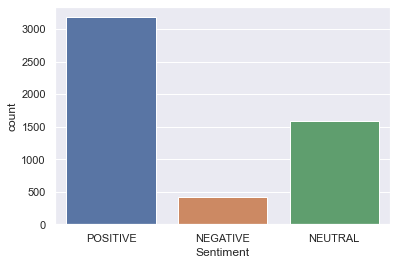

In [34]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="Sentiment", data=Twitter)

In [35]:
def sentiment(value):
    if value == 1:
        return 1
    if value == 0:
        return 0

In [36]:
Twitter['Logistic_Regression_Sentiment']=Twitter['Output_LR'].apply(sentiment)

### Logistic_Regression_Sentiment

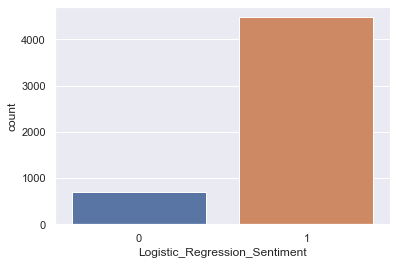

In [37]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="Logistic_Regression_Sentiment", data=Twitter)

In [38]:
Twitter

,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,SearchHastags,...,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity,Output_LR,Logistic_Regression_Sentiment
0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",#iphone13,...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.300000,0.900000,POSITIVE,objective,1,1
1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",#iphone13,...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.160000,0.540000,POSITIVE,objective,1,1
2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",#iphone13,...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.100000,0.100000,NEGATIVE,objective,1,1
3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",#iphone13,...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.600000,0.600000,POSITIVE,objective,1,1
4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",#iphone13,...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.000000,0.000000,NEUTRAL,subjective,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,NAIJAVILLE1,"🐼A platform for all gists,topics and news arou...","Ikeja, Nigeria",1259,246,9714,0,@DONJAZZY \nDAY 3 COUNTDOWN SEEKING OF BIRTHDA...,"['DonJazzy', 'birthday', '25y', 'cakes', 'lapt...",#iphone11,...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,0.800000,0.750000,POSITIVE,objective,1,1
5181,YaD3v,‏الصفحة الخاصه بـ YaD3v لبرمجة تطبيقات الـ iOS...,Saudi Arabia,6,129,2390,0,Download #UTG pro to get all #video_games info...,"['UTG', 'video_games', 'iOS', 'iPhone', 'iPad'...",#iphone11,...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download ut pro get video_game information wan...,0.400000,0.400000,POSITIVE,objective,1,1
5182,kiddzillastudio,Missing,Missing,4,0,2,0,Legends Never Die. Our New iPhone Case design ...,"['iphone11', 'phone12', 'iphone13', 'iphone14'...",#iphone11,...,legends never die new phone case design comes ...,legends never die new phone case design comes ...,legends never die new phone case design comes ...,legend never die new phone case design come ph...,0.136364,0.454545,POSITIVE,objective,1,1
5183,sook_seek,Missing,Missing,1,1,291,0,🅿🆁🅸🅲🅴 🅳🆁🅾🅿\n🥳 10 % 🅲🅰🆂🅷🅱🅰🅲🅺 🥳\n𝗔𝗽𝗽𝗹𝗲 𝗶𝗣𝗵𝗼𝗻𝗲 𝟭𝟭...,"['appleiphone', 'iphone11', 'b

In [39]:
filename = 'Supervised_Learning_Output.csv'
Twitter.to_csv(filename)

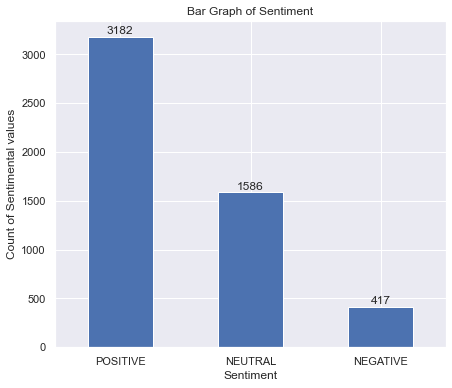

In [40]:
import matplotlib.pyplot as plt
Sentiment = Twitter['Sentiment'].value_counts()
plt.figure(figsize=(7, 6))
ax = Sentiment.plot(kind='bar', rot=0, color="b")
ax.set_title("Bar Graph of Sentiment", y = 1)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count of Sentimental values')
ax.set_xticklabels(('POSITIVE', 'NEUTRAL', 'NEGATIVE'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

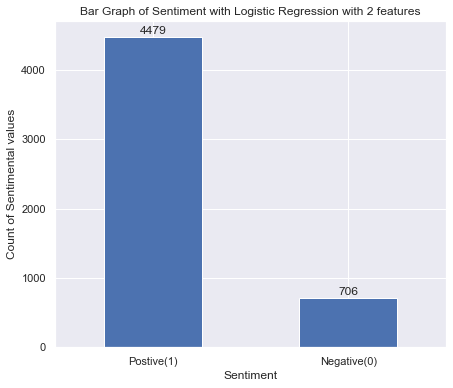

In [41]:
import matplotlib.pyplot as plt
Sentiment = Twitter['Logistic_Regression_Sentiment'].value_counts()
plt.figure(figsize=(7, 6))
ax = Sentiment.plot(kind='bar', rot=0, color="b")
ax.set_title("Bar Graph of Sentiment with Logistic Regression with 2 features", y = 1)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count of Sentimental values')
ax.set_xticklabels(('Postive(1)', 'Negative(0)'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()